In [0]:
# link google drive to google colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd/content/drive/My Drive/Colab Notebooks/Python Practice

/content/drive/My Drive/Colab Notebooks/Python Practice


In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
my_data=pd.read_csv('telecust.csv')
my_data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [0]:
my_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [0]:
my_data.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [0]:
X=my_data[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [0]:
y=my_data['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [0]:
X,y=shuffle(X,y)

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.19883553,  0.91216835,  0.50316528,  1.0100505 ,  0.73886812,
        -0.09846657, -1.36767088,  1.39058626, -0.22207644, -1.03459817,
         0.46617787, -1.32797979],
       [-1.25277087, -1.28932658,  0.58283046, -0.9900495 ,  0.24291691,
         0.5277565 ,  1.0877526 , -0.19718083, -0.22207644,  0.96655883,
        -0.92747794,  1.35119935],
       [-1.25277087, -0.68040245,  0.18450456,  1.0100505 , -0.74898553,
        -0.4816777 ,  0.26927811, -0.89182893, -0.22207644, -1.03459817,
        -0.23065004,  1.35119935],
       [-0.02696767,  0.2564039 ,  0.82182601, -0.9900495 ,  1.53239007,
        -0.44429125, -0.54919639, -0.89182893, -0.22207644,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.63112644,  1.698143  , -0.9900495 ,  0.63967788,
        -0.6312235 , -0.54919639, -0.89182893,  4.50295411, -1.03459817,
        -0.92747794,  0.45813963]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


In [0]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 1, 3, 3])

In [0]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.83875
Test set Accuracy:  0.745


In [0]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.78 , 0.755, 0.77 , 0.745, 0.79 , 0.745, 0.78 , 0.8  , 0.775])

In [0]:
std_acc

array([0.02929164, 0.03041176, 0.02975735, 0.03082004, 0.02880104,
       0.03082004, 0.02929164, 0.02828427, 0.02952753])

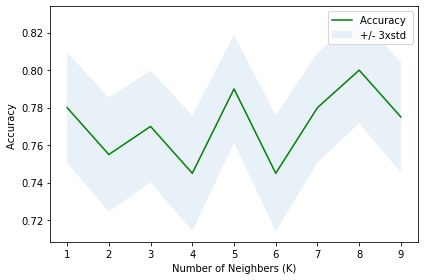

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbers (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8 with k= 8
